In [29]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [30]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [31]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [32]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [10]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [11]:
import uuid
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))


'data\\anchor\\3b4b2af4-e079-11ef-86e5-60189528fa7a.jpg'

In [33]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture image")
        break

    # Get frame dimensions
    height, width, _ = frame.shape

    # Ensure the frame is large enough for cropping
    if height >= 250 and width >= 250:
        # Calculate center crop for 250x250
        center_x, center_y = width // 2, height // 2
        x1, y1 = max(center_x - 125, 0), max(center_y - 125, 0)
        x2, y2 = min(center_x + 125, width), min(center_y + 125, height)

        # Crop the frame
        cropped_frame = frame[y1:y2, x1:x2]

        # Ensure the cropped frame is exactly 250x250
        if cropped_frame.shape[0] == 250 and cropped_frame.shape[1] == 250:
            frame = cropped_frame
        else:
            print(f"Warning: Cropped size is {cropped_frame.shape[:2]}, resizing to 250x250")
            frame = cv2.resize(cropped_frame, (250, 250))

    else:
        print("Error: Frame size is too small for 250x250 cropping.")
        continue

    # Capture images when keys are pressed
    key = cv2.waitKey(1) & 0xFF
    if key == ord('a'):
        imgname = os.path.join(ANC_PATH, f"{uuid.uuid1()}.jpg")
        cv2.imwrite(imgname, frame)
        print(f"Anchor image saved: {imgname}")

    if key == ord('p'):
        imgname = os.path.join(POS_PATH, f"{uuid.uuid1()}.jpg")
        cv2.imwrite(imgname, frame)
        print(f"Positive image saved: {imgname}")

    # Show image back to screen
    cv2.imshow('Image Collection', frame)

    # Breaking gracefully
    if key == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()

Positive image saved: data\positive\23cc3592-e07b-11ef-9400-60189528fa7a.jpg
Anchor image saved: data\anchor\2627199c-e07b-11ef-a622-60189528fa7a.jpg


Frame Size: 250x250


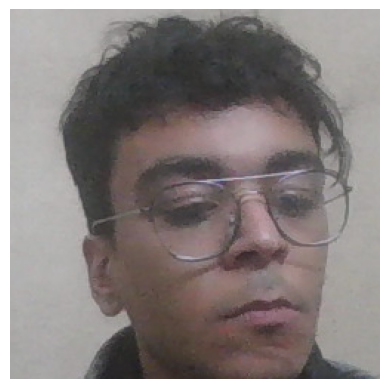

In [35]:
if not ret:
    print("Failed to capture image")
else:
    # Get frame dimensions
    height, width, _ = frame.shape
    print(f"Frame Size: {width}x{height}")

    # Ensure cropping is within bounds
    x1, y1 = max(0, width // 2 - 125), max(0, height // 2 - 125)
    x2, y2 = min(width, x1 + 250), min(height, y1 + 250)

    # Crop and display
    cropped_frame = frame[y1:y2, x1:x2]
    
    if cropped_frame.shape[0] != 250 or cropped_frame.shape[1] != 250:
        print(f"Resizing cropped frame from {cropped_frame.shape[:2]} to (250, 250)")
        cropped_frame = cv2.resize(cropped_frame, (250, 250))  # Resize to exact 250x250

    # Convert BGR to RGB for Matplotlib
    plt.imshow(cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()